## Introduction

### The Origin of ESUPS 

Enter ESUPS (Emergency Supply Pre-positioning Strategy). Founded in 2016, ESUPS emerged from the recognition that effective disaster response requires more than just post-disaster fundraising—it necessitates proactive, strategic planning and resource allocation. Initially launched as a collaborative effort among several NGOs, ESUPS aimed to tackle the very issues that hampered the Nepal earthquake response by creating a global database of pre-positioned supplies. This innovative initiative ensures that the nearest available resources are utilized first, enabling aid organizations to make informed decisions and address the most urgent needs swiftly.

ESUPS started as a modest project, built on a simple spreadsheet that cataloged available disaster relief supplies across various regions. However, as the project gained traction and more organizations began contributing data, it became clear that a more sophisticated approach was needed. In response, ESUPS partnered with academic institutions like Penn State University and MIT, as well as industry leaders such as Gurobi, to develop advanced models for optimizing the allocation and movement of these supplies.

One of ESUPS’ early successes was the development of a simulation model that could identify the optimal locations for pre-positioning disaster relief supplies. This model proved instrumental in reducing response times and ensuring that critical resources reached disaster zones faster and more efficiently. Over time, ESUPS expanded its database to include hundreds of NGOs, each contributing data that made the system more robust and comprehensive. The impact of this collaborative effort was soon evident, as ESUPS’ models helped improve response times in several subsequent disaster scenarios.

By 2020, ESUPS had grown into a globally recognized initiative, with its strategies being adopted by numerous international aid organizations. The project’s achievements include not only the development of cutting-edge optimization models but also the successful implementation of these models in real-world disaster scenarios. ESUPS has been credited with significantly enhancing the effectiveness of disaster relief efforts, saving lives, and reducing the costs associated with disaster response logistics.

### ESUPS Today

Today, ESUPS continues to lead the way in disaster preparedness, leveraging the latest technological advancements and fostering collaboration between NGOs, academia, and the private sector. Its success story is a testament to the power of data-driven decision-making and the importance of pre-positioning strategies in disaster relief. As ESUPS looks to the future, its focus remains on refining its models, expanding its global reach, and continuing to make a tangible difference in the lives of those affected by disasters.

### Diving into the Case Study & Jupyter Notebook

In this notebook, we will take you through the end-to-end process of how ESUPS transformed from a simple idea into a global initiative that is reshaping disaster response logistics. We will delve into the crucial role that optimization plays in this transformation, demonstrating how ESUPS utilizes advanced algorithms to optimize the allocation and movement of disaster relief supplies.



Starting with the initial challenges faced by disaster relief organizations and the inefficiencies of traditional response methods, we will explore how ESUPS identified these gaps and developed a pioneering approach to pre-positioning resources. 

The notebook will provide a detailed walkthrough of the optimization models that underpin ESUPS, offering a high-level explanation of the algorithms used and their practical applications. You’ll see how ESUPS has integrated real-world data into these models to make informed decisions that improve response times and potientally save lives.

-    **NOTE:** While ESUPS is operating at a global scale, the case study will focus on building a model for only one country: Madagascar. This reduction in scope allows us to more clearly walk learners through a smaller version of the problem, and leverage either our limited-size Gurobi license (available to all learners), or our full Gurobi academic license (available to all currently affiliated students, instructors, and researchers) to solve the model. 


To deepen your understanding, the notebook includes practical exercises that allow you to engage directly with the concepts. You’ll encounter self-assessment multiple-choice questions and hands-on code implementation problems designed to reinforce your learning and give you the opportunity to experiment with optimization techniques. These exercises are crafted to help you build confidence in applying the concepts without the pressure of graded responses.

Additionally, for those eager to dive deeper, the notebook features extension prompts that encourage you to think critically about how the underlying optimization problems could be adapted or expanded. These prompts are designed to challenge your creativity and problem-solving skills, enabling you to explore new ideas and potential improvements to the models.

Finally, we’ll pull back the curtain to reveal the production code used by ESUPS, written by experts in the field. You’ll have the opportunity to examine real-world code implementations that drive ESUPS’ operations, gaining insight into the practical considerations and best practices for creating fast, reliable, and maintainable code. This section will also explore alternative approaches and the reasoning behind key decisions made in the development process, providing you with a comprehensive understanding of how these algorithms transition from theoretical models to production-ready solutions.
By the end of this notebook, you’ll have a solid grasp of how optimization, rather than machine learning, can be the most effective tool for solving complex logistical challenges, especially in high-stakes environments like disaster relief. You’ll also be equipped with the knowledge and practical skills to apply these techniques in your own projects, potentially making a significant impact in whatever field you choose to tackle.

The evolution of ESUPS from a spreadsheet repository to a sophisticated data-driven solution highlights the importance of efficient disaster relief logistics. However, while technology has significantly improved our ability to manage and allocate resources, it also presents new challenges. The task of optimizing supply distribution in real-time amidst unpredictable disaster scenarios is not just a logistical issue, but a complex data science problem. So, let's dive into the technical challenges of prepositioning supplies together!


### A Data Scientist's Perspective

Initially approaching this problem, your first instinct might be to leverage ML tools, after all the problem appears well suited for machine learning: We have an implicit reward function in how well our allocation meets the demand for supplies perhaps discounted by transit time and cost, and we have defined inputs (amount of supply and available warehouses) and outputs (where to store the supplies).

But just because the inputs and outputs are clear, the program is not easy to implement. Let's look at what solving this with ML tools would look like in practice:

#### A Machine Learning Approach


When considering machine learning (ML) approaches for complex problems, **neural networks (NNs)** are often one of the first tools that come to mind. This is understandable, as NNs are powerful function approximators capable of learning intricate patterns and relationships from large datasets. Given enough data and model capacity, they can approximate any function to arbitrary precision (a property known as the Universal Approximation Theorem).

However, for this case study on disaster relief in Madagascar, we face significant constraints. We have reliable data on only **64 disaster events**, with each event characterized by limited features—primarily location, type, and impact. Additionally, our objective involves optimizing **supply allocations** for **13 different items** across **27 warehouses**. The challenge here is substantial: we must map a small, sparse dataset with limited features to a vast solution space, all while contending with a noisy reward function that makes it difficult to gauge success. 


#### Challenges with Sparse Data and Neural Networks

Sparse data is a notorious problem in machine learning. With only 64 data points, a neural network would struggle to generalize well, especially given the high-dimensional output space—13 items across 27 warehouses—resulting in 351 decision variables. Now there are several ways to deal with sparse data in ML and you might have your own technique or want to give it a try, and you absolutely should! If you find interesting results, we'd love to hear about them, but for now, let's consider one of the most popular techniques: data interpolation.



**Data interpolation** attempts to create a probability distribution that closely mirrors real-world events, allowing us to sample synthetic data for training. Ideally, this synthetic data is representative enough that a neural network can learn from it. However, generating such a distribution is often as challenging as the original problem—especially when the relationships are highly complex or unpredictable. For instance, allocating goods based on past data might work, but predicting future disasters’ location, type, and impact introduces an additional layer of complexity.

Likely the first method that comes to mind when picking an ML approach is neural networks, and for good reason. Neural networks are incredibly powerful tools that have transformed the modern world, they're able to approximate any function to arbitrary precision provided they are large enough and have enough data. However, in this case study, we'll be drilling down to look at disasters in Madagascar, for which we only have reliable data on 64 events. Even worse, each disaster is characterized by limited information, mainly location, type, and impact.




##### Conceptualizing the Search Space

Assuming we could synthesize realistic disaster scenarios, we might then train a neural network to predict optimal supply positions. This would involve a straightforward training loop: provide disaster scenarios to the neural network, predict supply allocations, compute the loss (e.g., time or cost to meet demand), and update the model using backpropagation.

However, consider the **search space** that the neural network must navigate. Each potential supply allocation corresponds to a 13x27 matrix, resulting in **351** output variables. To understand the magnitude of this space, let’s do some Let's do some back-of-the-napkin calculations using the the stars and bars combinatorial formula to see how many potential solutions we might have:



Let $S$ be the total number of items for a given supply type and $W$ be the number of warehouses. The formula for number of combinations for a given row is:

$$
\begin{aligned} 
Combinations &= \frac{S+W-1!}{(W-1)!(S)!}
\end{aligned}
$$

For example we have 40811 buckets accross all 27 warehouses. So we would get:

$$
\begin{aligned} 1.89\cdot 10^{93}
\end{aligned}
$$


For context, the estimated number of **atoms** in the observable universe is between $10^{78}$ and  $10^{82}$. So for each atom could be associated with between $10^11$ and $10^15$ solutions and we would still have more left over


And we can't forget there are 12 more rows. And because the rows are independent, we have the total possible number of combinations of each row multiplied by the combination of each other. Let's say we have the same amount of other items, then we get:
$$
\begin{aligned} (1.89\cdot 10^{93})^{13} \approx 10^{1209}
\end{aligned}
$$


This is not just a large number; it is a number so vast that it defies comprehension. For comparison, a Googol is $10^{100}$. Our solution space is so large that if we could somehow sample a billion ( 10^9 ) combinations per second, it would still take longer than the age of the universe to explore even a minuscule fraction of this space (see proof below).

When we train a neural network, it essentially samples a point from this enormous solution space during each iteration and then uses gradient-based methods to find a better point. However, with more possible solutions than there are particles in the universe, the likelihood of sampling a truly optimal solution—or even knowing how close a solution is to the optimum—becomes exceedingly slim. It’s like searching for a single grain of sand on all the beaches in the world, blindfolded, while new grains are constantly being added.

This illustrates why a brute-force approach or even a gradient-based sampling approach is ineffective for such vast combinatorial spaces. Instead, we need methods that can systematically explore the space and make informed decisions to find the optimal or near-optimal solutions more efficiently.

##### Proof 

$1$ year  $\approx 3.154 \cdot 10^7$ seconds

$13.8$ billion years = $13.8 \cdot 10^9$ years = $13.8 \cdot 10^9 \cdot 3.154 \cdot 10^7$ Seconds 

$4.35 \cdot 10^26$ $\approx 10^{26}$ Seconds In Universe


Fraction Explored = $\frac{10^{26}}{10^{1209}}$ = $\frac{1}{10^{1183}}$

#### Optimization: A Structured Approach to the Solution Space

After exploring the challenges of using neural networks to navigate the vast solution space, it’s clear that the sheer size of possible allocations makes a purely machine learning approach inefficient for this problem. Neural networks, while powerful, rely on sampling from a solution space inconceivably large and gradually improving through incremental updates. This approach can be highly ineffective when dealing with a combinatorial explosion of possibilities, as we saw with our earlier calculations.

Instead, when faced with such a **well-defined** problem—where we know the objective function, inputs, outputs, and constraints—a more **structured** approach through optimization becomes not only viable but advantageous. Optimization techniques are specifically designed to handle these kinds of problems efficiently by applying systematic mathematical logic rather than heuristic sampling.

In this case, our problem is clearly formulated:

**Objective Function** (What we want to minimize):

-	Minimize the travel time or cost required to meet demand by pre-positioning supplies.

**Constraints** (how we can change the variables): 

-	Ensure demand is met without exceeding available supplies.

Optimization frameworks, unlike neural networks, don’t blindly sample solutions from a vast space. Instead, they apply logical methods to systematically explore and reduce the search space, ultimately providing a set of potential optimal solutions. This not only increases efficiency but also provides clarity and insight into why a particular solution is optimal, which is invaluable for decision-making and explanation.

##### The Simplex Method

The Simplex Method is a powerful algorithm for solving linear programming problems, which involve optimizing a linear objective function subject to linear constraints. Based on geometric principles, it efficiently navigates the feasible region—a polyhedron formed by the intersection of these constraints—to find the optimal solution at one of its vertices or "corner points." In linear programming, the optimal solution is guaranteed to be at a vertex because the objective function improves as we move along the edges of the polyhedron until we can't improve any further.

To visualize this, imagine a two-dimensional feasible region shaped like a polygon on a graph. Each point within this polygon represents a possible solution that satisfies the constraints. The Simplex Method moves from one vertex to another along the edges of this polygon, evaluating the objective function at each corner point. This process is efficient because it doesn't require checking every possible point within the feasible region.

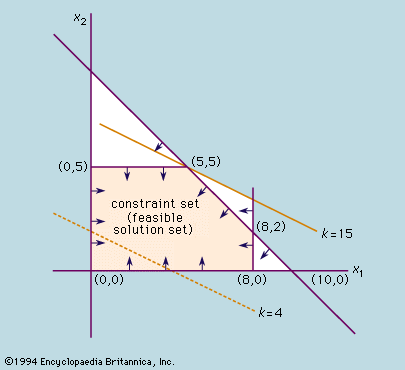

In [126]:
Image(filename='images/Simplex.png') 

For example, if you're trying to maximize your enjoyment by purchasing hotdogs and soda with a limited budget, you'd intuitively spend all your money, fully utilizing your budget constraint. The optimal solution occurs at the point where your spending exactly meets your budget limit—one of the vertices of the feasible region where the constraints are tight or binding.

In the context of pre-positioning supplies for disaster response, each allocation affects the total transit time. The goal might be to meet demand with the minimum possible transit time, which requires allocating supplies so that the constraints are fully utilized—providing just enough to meet each warehouse's demand without surplus. This means the optimal solution will be at a vertex where the supply and demand constraints are exactly satisfied.

In transportation problems like ours, with whole-number supplies and demands, we're distributing indivisible units like buckets or hygiene kits. Since the suppliers have integer quantities to offer and the consumers require integer quantities to receive, the shipments must also be in whole numbers to exactly meet these needs. Fractional shipments wouldn't satisfy the exact integer requirements, nor would they make practical sense when items can't be divided.

Geometrically, because the constraints are defined by integer values, the feasible region is a polyhedron whose vertices correspond to integer solutions. The Simplex Method, by moving along the edges of this integer-defined polyhedron, often arrives at integer solutions naturally. The constraints dictate that the total shipped from each supplier equals their supply and the total received by each consumer equals their demand, both of which are integers. This setup leads to shipment amounts that are integers because only whole units can satisfy both the supply and demand without leaving any fractions unaccounted for.

This approach offers a clear advantage: instead of searching through a massive number of possible solutions within the feasible region—as might be necessary with other methods—the Simplex Method only needs to evaluate a finite number of vertices, one of which will be the optimal solution. In transportation problems with integer constraints, it often provides optimal integer solutions without the need for additional techniques like the Branch and Bound Method (read more about this in the Math Addendum). This makes the Simplex Method both effective and practical for scenarios where exact quantities are essential.

#### An Advancing field

Optimization has taken a backseat with the rise of Machine Learning and Big Data. But if you think back to your courses, you’ll remember that both fields share many of the same mathematical roots. Many core ML concepts, like gradient descent, evolved from numerical optimization techniques like Newton’s method. I bring this up because, even though optimization might seem less flashy compared to the latest ML algorithms, it’s experiencing a resurgence. Recent advancements in solvers and algorithms have made optimization more powerful and easier to use, allowing it to tackle complex, large-scale problems that were previously out of reach. There are also many free educational resources available to get problem solvers up and running with optimization, making it more accessible than ever before—check out www.gurobi.com/learn for just some of the educational materials openly available to learners. All of this means it’s becoming an essential tool for decision-making in various industries, from logistics to finance.
Just as an example, Gurobi, the most popular optimization model currently avalible, has seen a speed-up of 80% for problem like pre-positioning and has increased the solver's flexibility ~67% in the past 10 years 


Just as an example, Gurobi, the most popular optimization solver currently available, has seen a speed-up of 80% for problems like pre-positioning and has increased the solver's flexibility ~67% in the past 10 years

And this is still very much under active development. Take a look at some of the improved speeds for large problems in the table below! (It's not important that you know the specific names, but nearly every problem you would use optimization for falls in this table!)


|Problem Class | Speed-Up in Past year | 
| -------- | ------- |
| Mixed-Integer Linear Program (MILP)  | 12.4% |
| Mixed-Integer Quadratic Program (MIQP) | 22.8% |
| Mixed Integer with Quadratic Constraints Program (MIQCP) | 18.2% |

<sup> Comparing Version 10.0 (released Nov 22) and Version 11.0 (released Nov 23) </sup>


If your curious about what this means for real life applications, take a look below at some of the examples!

#### A Few Real World Examples:

##### 1.	Mixed-Integer Linear Program (MILP):

MILPs are widely used in logistics and supply chain optimization. A real-world example is vehicle routing for delivery companies like UPS or FedEx, where the goal is to minimize the total distance traveled or delivery time while meeting constraints such as vehicle capacity, delivery time windows, and route restrictions. Advanced MILP solvers allow these companies to dynamically adjust routes in real-time, respond to traffic conditions, and make last-minute changes. This type of optimization is also critical in energy management, such as optimizing the scheduling of power generation plants to meet fluctuating demand while minimizing costs and adhering to regulatory and operational constraints.


##### 2.	Mixed-Integer Quadratic Program (MIQP): 

MIQPs find applications in financial portfolio optimization, where the goal is to maximize returns while minimizing risk. In this context, the quadratic term represents the risk (variance or covariance of asset returns), and the integer constraints can represent decisions like “buy or don’t buy” a particular asset or “fully divest from one sector.” Hedge funds and asset management firms use MIQP to optimize asset allocation, considering various market scenarios and investment constraints. The ability to handle complex quadratic relationships between variables makes MIQP suitable for any industry where risk management and trade-offs are involved, such as in optimizing communication networks and antenna placements.

##### 3.	Mixed Integer with Quadratic Constraints Program (MIQCP):

MIQCPs are used in engineering design and manufacturing. An example is optimizing the layout of a factory floor or the design of an aircraft wing. The quadratic constraints might represent aerodynamic properties or stress limits, while integer variables can represent decisions like the number of machines or parts used. In the pharmaceutical industry, MIQCP can help optimize drug formulation processes by considering a wide range of constraints like stability, release rates, and production costs. The combination of integer and quadratic constraints allows for highly tailored solutions that can significantly reduce costs and improve performance in complex industrial systems.

####
In addition, optimization programs like Gurobi offer powerful tools such as pre-solve, which can significantly simplify models before they are solved. For instance, the country-level ESUPS model we’re working on would typically require 812 iterations of the simplex algorithm to reach a solution. However, with pre-solve enabled, it reduces that number to just one iteration! This kind of optimization not only saves time but also dramatically reduces computational costs.

Imagine the impact if large language models (LLMs) like ChatGPT could suddenly use 23% fewer computational resources to train and run, or if their size could be reduced by two orders of magnitude while maintaining the same level of performance. This would save hundreds of millions of dollars and lead to a surge in locally hosted LLMs. Similarly, in the field of optimization, problems that were once considered too large or too complex to solve are becoming increasingly feasible each year.

Just like machine learning algorithms, the mathematical foundations behind optimization techniques can be quite intricate and certainly justify the rigor of PhD programs. However, as with popular libraries like PyTorch, TensorFlow, and XGBoost, you don’t need to master all the underlying math to use these tools effectively—it’s more important to know how to set up the problem correctly.

For the rest of this notebook, we’ll focus on how to formulate optimization problems and use accessible tools like Gurobi to solve them. If you’re interested in diving deeper into the mathematical concepts, check out the Addendum section. However, this is not necessary for understanding how to use this notebook or Gurobi effectively!